In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Overview:

- Period: 01/10/2021 06:01 – 29/12/2021 23:51
- Feed interactions: 76,892,800 rows
- Users: 163,205
- Posts: 7,023

Feedback (target):
It uses implicit feedback as the target:
a value of 1 is assigned to a post view if the user liked the post shortly after viewing it, and 0 otherwise.

In [2]:
X = pd.read_csv('feed_data_targets.csv') 
X.head()

,timestamp,user_id,post_id,action,target
0,2021-10-11 16:01:30,3462,3366,view,1
1,2021-10-11 16:04:55,3462,3699,view,1
2,2021-10-11 16:14:46,3462,2840,view,1
3,2021-10-14 21:37:51,3462,3188,view,1
4,2021-10-14 21:39:43,3462,2866,view,1


In [3]:
post_data = pd.read_csv('post_data.csv')
post_data.head(1)

,post_id,text,topic
0,1,UK economy facing major risks\n\nThe UK manufa...,business


In [4]:
post_data = post_data.drop('text',axis=1)
post_data.head(1)

,post_id,topic
0,1,business


In [5]:
user_data = pd.read_csv('user_data.csv')
user_data.head(1)

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads


In [6]:
all_data = X.merge(post_data,on='post_id',how='left')
all_data = all_data.merge(user_data,on='user_id',how='left')
all_data.head(2)

,timestamp,user_id,post_id,action,target,topic,gender,age,country,city,exp_group,os,source
0,2021-10-11 16:01:30,3462,3366,view,1,covid,0,18,Russia,Alapayevsk,4,Android,ads
1,2021-10-11 16:04:55,3462,3699,view,1,covid,0,18,Russia,Alapayevsk,4,Android,ads


In [ ]:
all_data['timestamp'] = pd.to_datetime(all_data['timestamp'])
all_data = all_data.sort_values(by='timestamp')

Distribution of lies

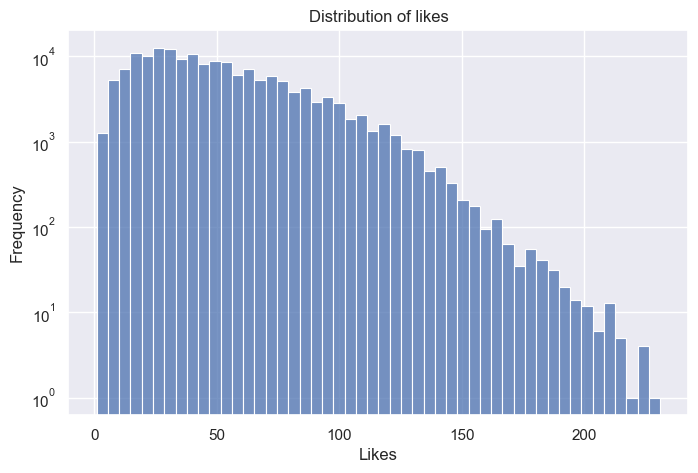

In [76]:
# likes
data = all_data.groupby('user_id').size()
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,5))
sns.histplot(data, bins=50, kde=False)
plt.yscale('log')  
plt.xlabel("Likes")
plt.ylabel("Frequency")
plt.title("Distribution of likes")
plt.show()

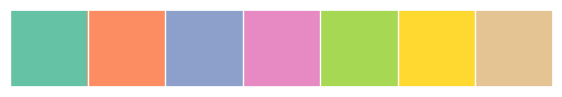

In [77]:
sns.palplot(sns.color_palette("Set2", 7))  

Likes by weekday

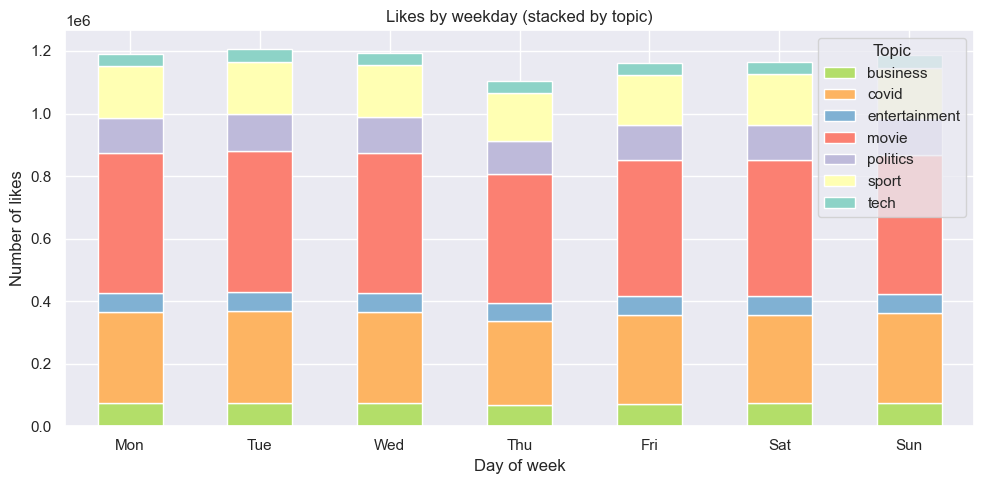

In [40]:
weekday_topic = all_data.groupby(['weekday', 'topic']).size().unstack(fill_value=0)
palette = sns.color_palette("Set3", 7)[::-1]
weekday_topic.plot(
    kind='bar', stacked=True, figsize=(10,5), color=palette
)
plt.xticks(range(7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], rotation=0)
plt.title('Likes by weekday (stacked by topic)')
plt.xlabel('Day of week')
plt.ylabel('Number of likes')
plt.legend(title='Topic')
plt.tight_layout()
plt.show()


Likes by hour

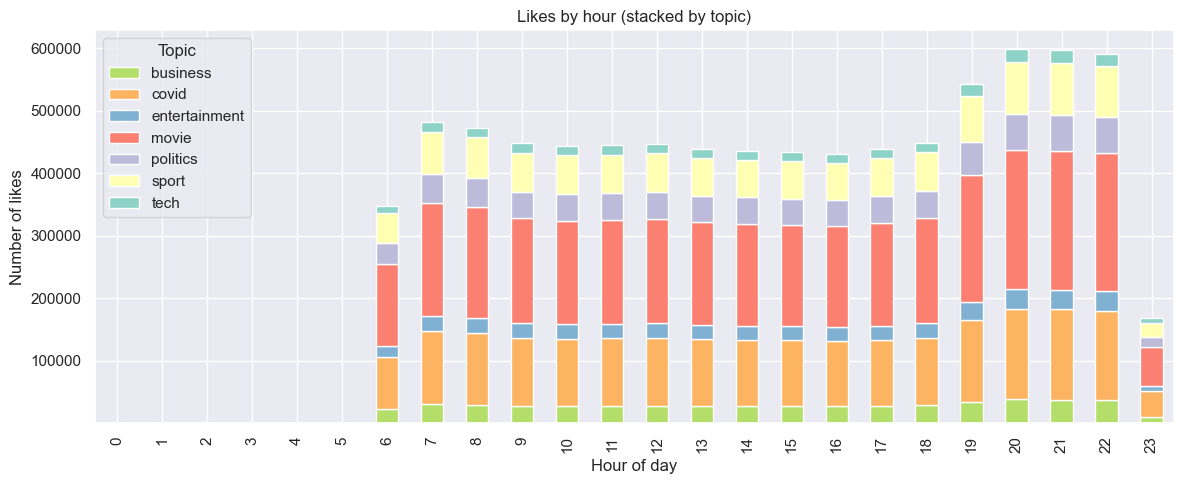

In [78]:
hour_topic = all_data.groupby(['hour', 'topic']).size().unstack(fill_value=0)
# create right index 
hour_topic = hour_topic.reindex(sorted(hour_topic.index.union(range(24))), fill_value=0)
hour_topic = hour_topic.sort_index() 
hour_topic.plot(
    kind='bar', stacked=True, figsize=(12,5), color=palette
)

plt.xticks(range(24), range(24))  
plt.title('Likes by hour (stacked by topic)')
plt.xlabel('Hour of day')
plt.ylabel('Number of likes')
plt.legend(title='Topic')
plt.tight_layout()
plt.show()

Likes by topic

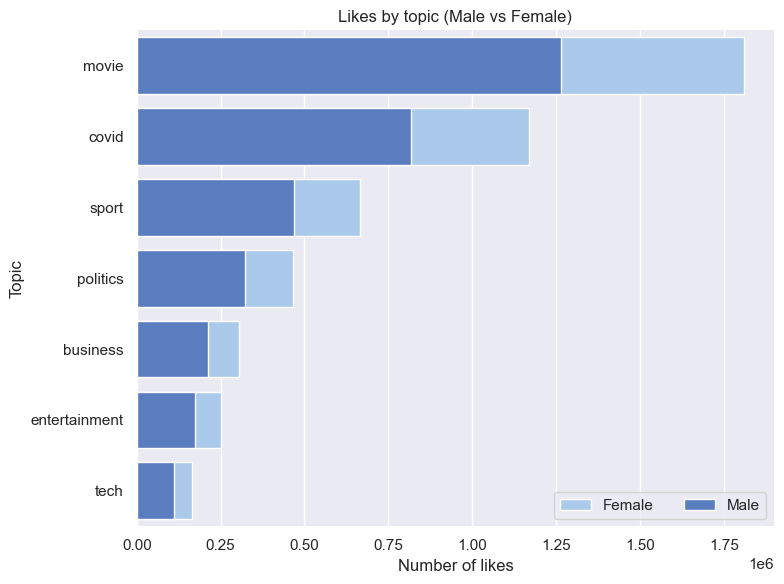

In [ ]:



sns.set_theme(style="darkgrid")

topic_gender = all_data.groupby(['topic', 'gender']).size().reset_index(name='likes')

topic_order = (
    topic_gender.groupby('topic')['likes'].sum()
    .sort_values(ascending=False)
    .index
)

f, ax = plt.subplots(figsize=(8, 6))

sns.set_color_codes("pastel")
sns.barplot(
    x='likes', y='topic', data=topic_gender[topic_gender['gender'] == 1],
    order=topic_order, label='Female', color='b'
)

sns.set_color_codes("muted")
sns.barplot(
    x='likes', y='topic', data=topic_gender[topic_gender['gender'] == 0],
    order=topic_order, label='Male', color='b'
)

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(
    xlabel="Number of likes",
    ylabel="Topic",
    title="Likes by topic (Male vs Female)"
)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


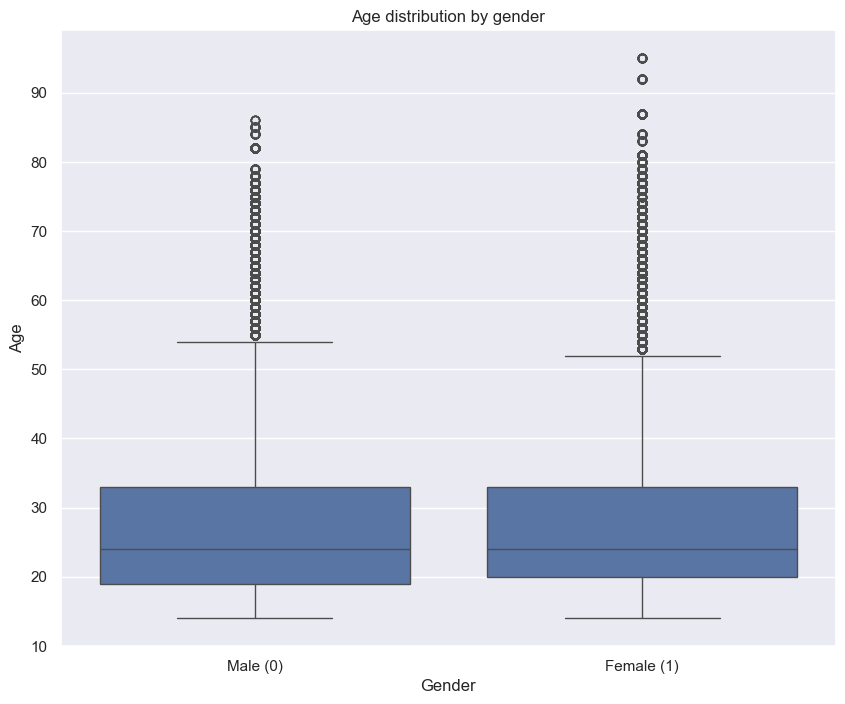

In [80]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,8))
sns.boxplot(
    x='gender', y='age', data=all_data,
)
plt.xticks([0,1], ['Male (0)', 'Female (1)'])
plt.title('Age distribution by gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

like activity

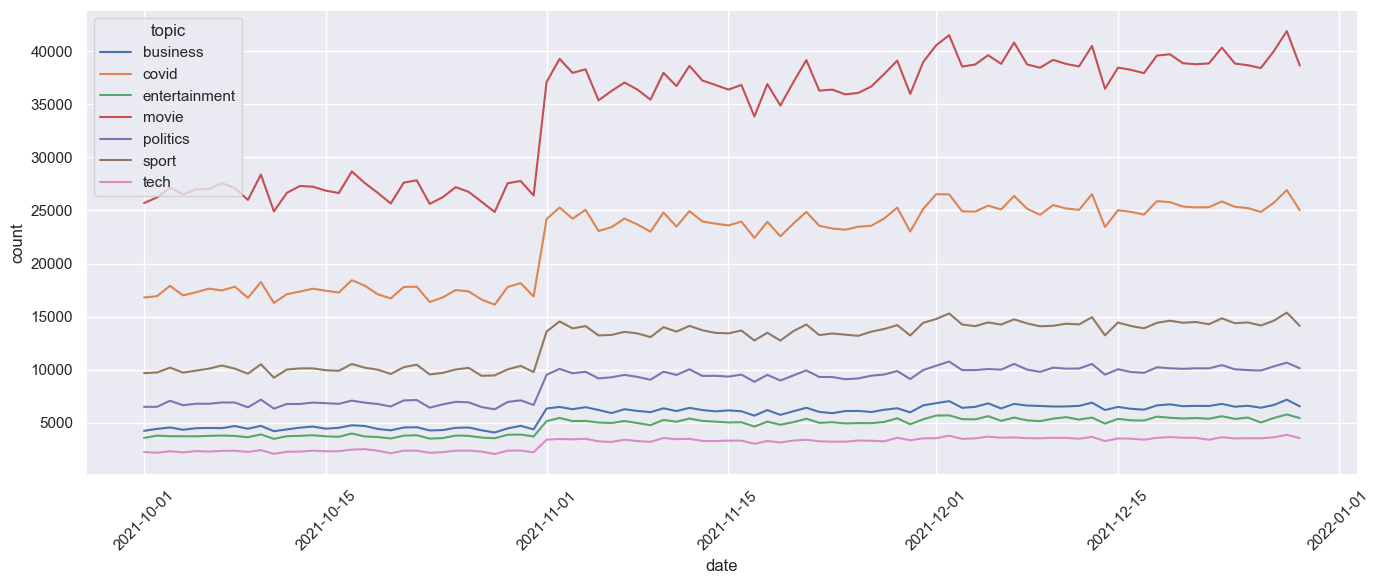

In [36]:
df = all_data.copy()
df['date'] = df['timestamp'].dt.date  # или .dt.floor('D') для datetime64

# Группировка по дате и топику, только target == 1
daily_target = (
    df[df['target'] == 1]
    .groupby(['date', 'topic'])
    .size()
    .reset_index(name='count')
)

# Построение графика
sns.set_theme(style="darkgrid")
plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_target, x='date', y='count', hue='topic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


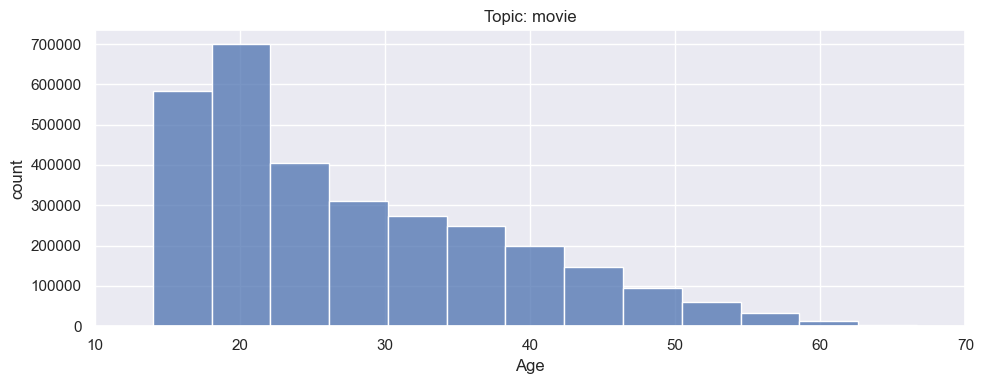

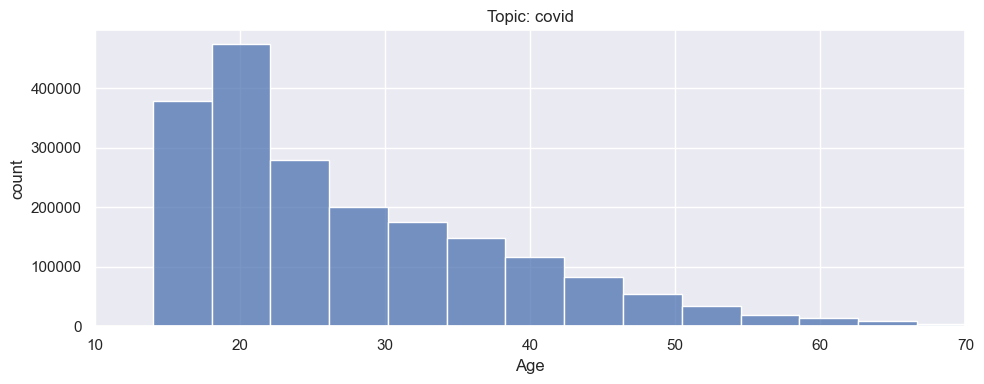

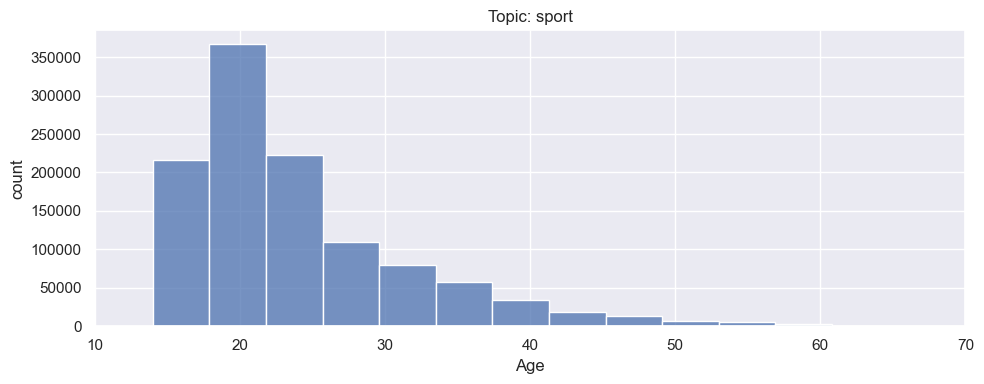

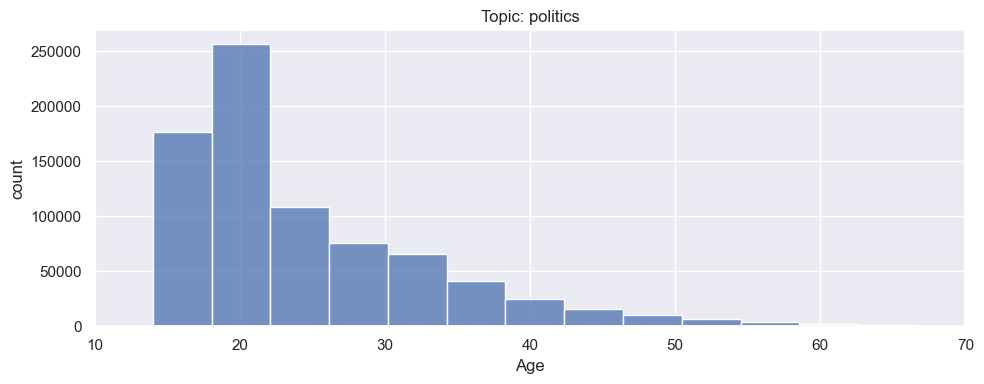

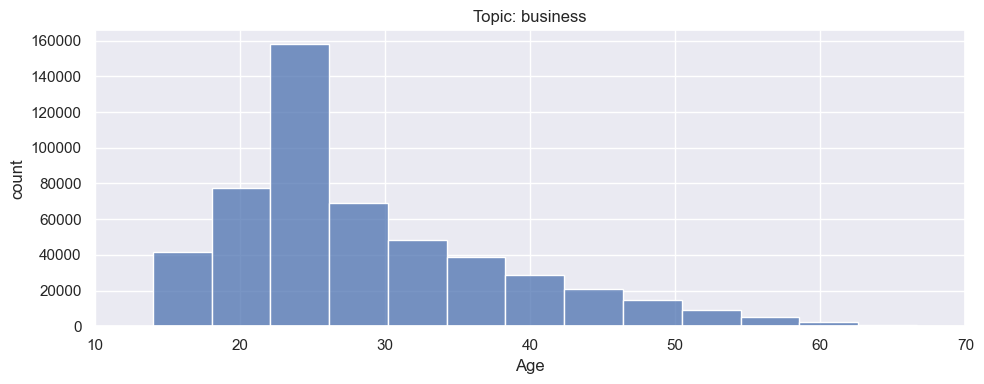

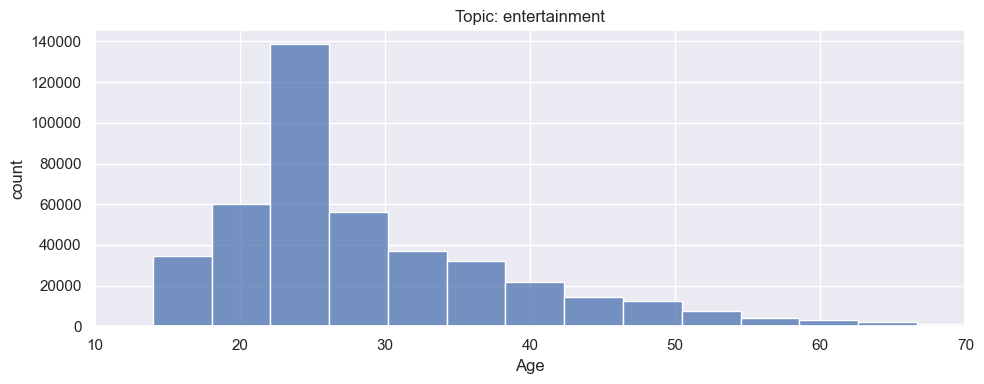

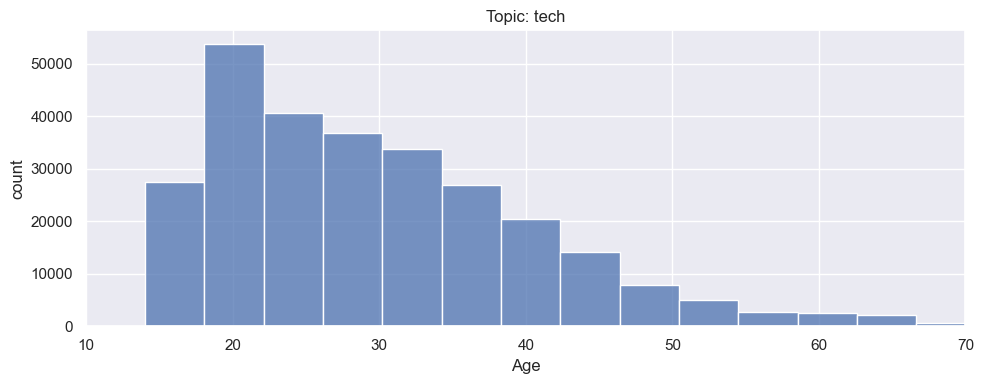

In [45]:
df = all_data.copy()

# Фильтруем только target == 1
df = df[df['target'] == 1]

# Настройка общего стиля
sns.set_theme(style="darkgrid")

# Уникальные топики
topics = df['topic'].unique()

# Построение отдельных гистограмм
for topic in ['movie','covid','sport','politics','business','entertainment','tech']:
    topic_df = df[df['topic'] == topic]

    plt.figure(figsize=(10, 4))
    sns.histplot(data=topic_df, x='age', bins=20, kde=False)
    
    plt.title(f'Topic: {topic}')
    plt.xlabel('Age')
    plt.xlim(10,70)
    plt.ylabel('count')
    plt.tight_layout()
    plt.show()


### Minimum number of events per user to cumulatively cover 90% of all events.

In [83]:
sorted_users = all_data.groupby('user_id').size().sort_values(ascending=False)
cumulative = np.cumsum(sorted_users) / sorted_users.sum()
threshold_index = np.argmax(cumulative >= 0.9)
threshold_value = sorted_users.iloc[threshold_index]
print(f"Threshold (90% of events): {threshold_value}")

# threshold_value — Minimum number of events per user to cumulatively cover 90% of all events

Threshold (90% of events): 28


In [86]:
cumulative = np.cumsum(sorted_users) / sorted_users.sum()
threshold_index = np.argmax(cumulative >= 0.9)
n_users_90 = threshold_index + 1  
fraction_users = n_users_90 / len(sorted_users) * 100

print(f"To account for 90% of all interactions:")
print(f"Only {n_users_90} out of {len(sorted_users)} users are needed")
print(f"Which represents approximately {fraction_users:.2f}% of the total user base")



To account for 90% of all interactions:
Only 117624 out of 163202 users are needed
Which represents approximately 72.07% of the total user base


In [87]:
post_counts = all_data["post_id"].value_counts()
n_top = int(len(post_counts) * 0.1)  
top_posts = post_counts.index[:n_top]
share_top = X["post_id"].isin(top_posts).mean()
print(f"Share of interactions on the top 10% of posts: {share_top:.2%}")

Share of interactions on the top 10% of posts: 23.20%
